In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import figure
from mpl_toolkits.mplot3d import Axes3D


data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')
y = data['sales']
X = np.column_stack((data['TV'], data['radio']))
print(y[0], X[0])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


22.1 [230.1  37.8]


In [75]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

Text(0.5, 0, 'Sales')

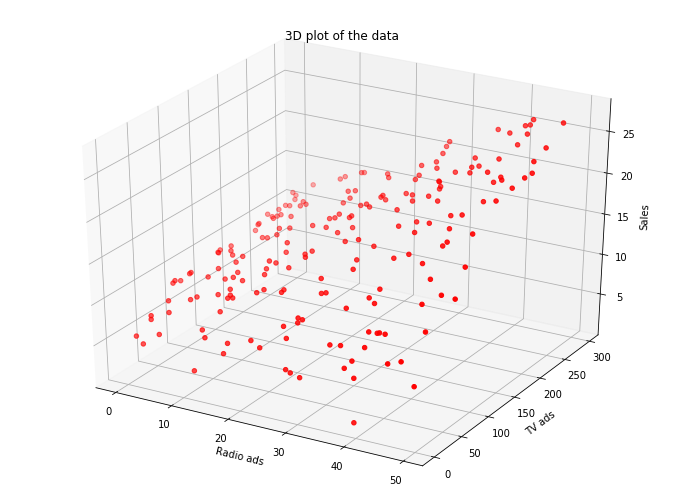

In [76]:
fig = plt.figure()
plt = fig.add_subplot(111, projection='3d')

Radio_data=[row[1] for row in X]
TV_data=[row[0] for row in X]

plt.scatter(Radio_data, TV_data, data['sales'], zdir='z', c= 'red')

plt.set_title("3D plot of the data")
plt.set_xlabel("Radio ads")
plt.set_ylabel("TV ads")
plt.set_zlabel("Sales")

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33)
reg = LinearRegression().fit(X_train,  y_train)
print(reg.coef_,  reg.intercept_ )
y_pred = reg.predict(X_test)


print(mean_squared_error(y_test, y_pred))


[3.80530826 2.79363059] 14.061633592533342
2.8718180347784346


Text(0.5, 0, 'Sales')

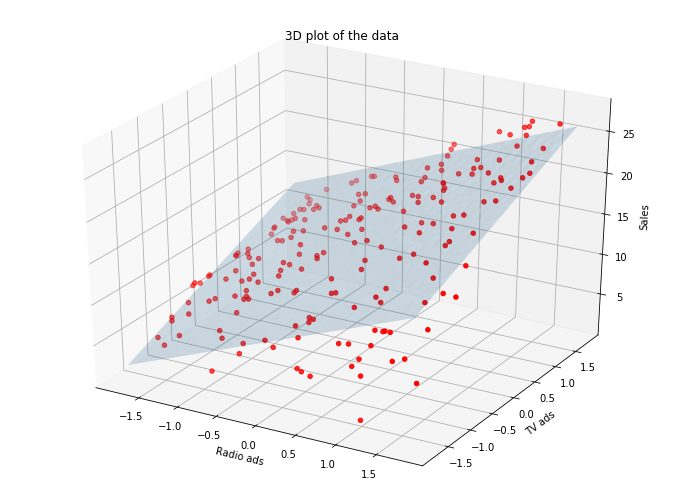

In [79]:
import matplotlib.pyplot as plt
from matplotlib import figure
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

plt = fig.add_subplot(111, projection='3d')

Radio_data=[row[1] for row in X_scaled]
TV_data=[row[0] for row in X_scaled]

plt.scatter(Radio_data, TV_data, data['sales'], zdir='z', c= 'red')

#
xs = np.linspace(-1.8, 1.8, 100)
ys = np.linspace(-1.8, 1.8, 100)

X, Y = np.meshgrid(xs, ys)
Z = reg.coef_[0]*X + reg.coef_[1]*Y + reg.intercept_ 

plt.plot_surface(X, Y, Z, alpha=0.2)
#


plt.set_title("3D plot of the data")
plt.set_xlabel("Radio ads")
plt.set_ylabel("TV ads")
plt.set_zlabel("Sales")

In [81]:

def gradient_descent(W, x, y):
    
    #calculating the intercept b
    avg_x1 = np.average([row[0] for row in x])
    avg_x2 = np.average([row[1] for row in x])
    b = np.average(y) - W[0]*avg_x1 -W[1]*avg_x2
    
    y_hat = x.dot(W).flatten() + b
    error = (y - y_hat)
    mse = (1.0 / len(x)) * np.sum(np.square(error))
    gradient = -(1.0 / len(x)) * error.dot(x)
    return gradient, mse

In [82]:
w = np.array((-40, -40))
alpha = .1
tolerance = 1e-3
 
old_w = []
errors = []

In [83]:
# Perform Gradient Descent
iterations = 1
for i in range(200):
    gradient, error = gradient_descent(w, X_scaled, y)
    new_w = w - alpha * gradient
 
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print("Iteration: %d - Error: %.4f" % (iterations, error))
        old_w.append(new_w)
        errors.append(error)
 
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print("Iteration: %d - Error: %.4f" % (iterations, error))
        print('Gradient Descent has converged')
        break
 
    iterations += 1
    w = new_w
 
print('w =', w)

Iteration: 10 - Error: 536.0012
Iteration: 20 - Error: 60.1591
Iteration: 30 - Error: 8.9582
Iteration: 40 - Error: 3.4489
Iteration: 50 - Error: 2.8561
Iteration: 60 - Error: 2.7923
Iteration: 70 - Error: 2.7854
Iteration: 80 - Error: 2.7847
Iteration: 83 - Error: 2.7846
Gradient Descent has converged
w = [3.91359776 2.77964408]


In [84]:
all_ws = np.array(old_w)
# Just for visualization
errors.append(400)
errors.append(300)
errors.append(225)
errors.append(120)
errors.append(30)

levels = np.sort(np.array(errors))

In [85]:
w0 = np.linspace(-w[0] * 5, w[0] * 5, 100)
w1 = np.linspace(-w[1] * 5, w[1] * 5, 100)
mse_vals = np.zeros(shape=(w0.size, w1.size))

In [86]:
for i, value1 in enumerate(w0):
    for j, value2 in enumerate(w1):
        w_temp = np.array((value1,value2))        
        mse_vals[i, j] = gradient_descent(w_temp, X_scaled, y)[1]

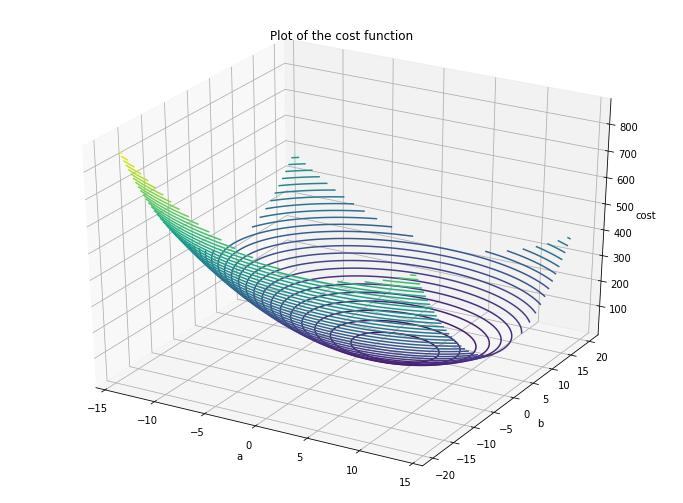

In [94]:
import matplotlib.pyplot as plt


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(w1, w0, mse_vals, 50, cmap='viridis')

# for angle in range(0, 360):
#     ax.view_init(0, angle)
plt.title("Plot of the cost function")
plt.xlabel("a")
plt.ylabel("b")
ax.set_zlabel("cost")
plt.show()


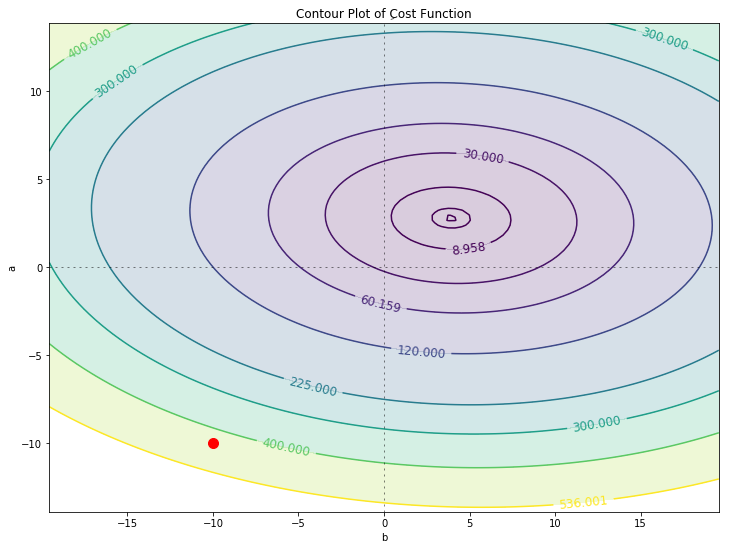

In [99]:


plt.contourf(w0, w1, mse_vals, levels,alpha=.2)
plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)

#plt.plot([-10], [-10], marker='o', markersize=10, color="red")

CS = plt.contour(w0, w1, mse_vals, levels)

plt.clabel(CS, inline=1, fontsize=12)
plt.title("Contour Plot of ِCost Function")
plt.xlabel("b")
plt.ylabel("a")


plt.show()


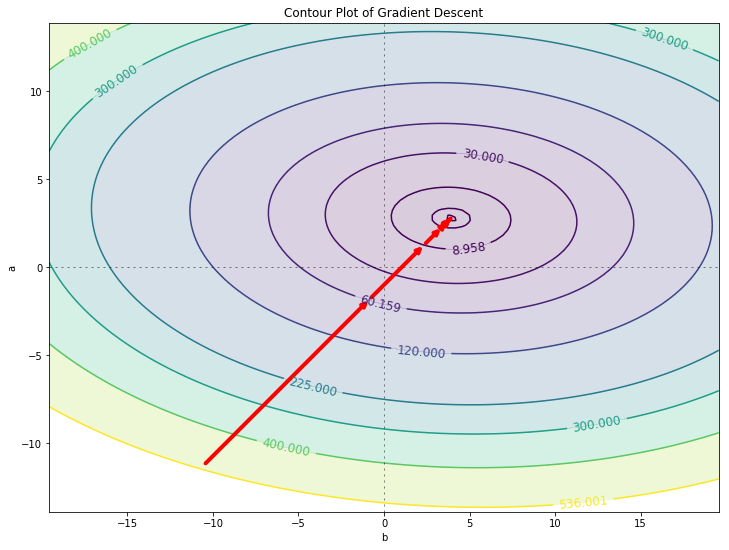

In [100]:

plt.contourf(w0, w1, mse_vals, levels,alpha=.2)
plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
for i in range(len(old_w) - 1):
    plt.annotate('', xy=all_ws[i + 1, :], xytext=all_ws[i, :],
                 arrowprops={'arrowstyle': '-|>', 'color': 'r', 'lw': 4},
                 va='center', ha='center')
    
    
CS = plt.contour(w0, w1, mse_vals, levels)

plt.clabel(CS, inline=1, fontsize=12)
plt.title("Contour Plot of Gradient Descent")
plt.xlabel("b")
plt.ylabel("a")


plt.show()